# Evolution of Einstein's equations

# Initial data constants definition

In [452]:
# Gaussian parameters
s1,s2=1,1;
R01,R02,R03=4,4,10; 
P=0.3;
P3=0;
B=0;

ori=0.0;

# Initial data , setting length of the domain and discretization


In [453]:
m=4;
N=2.0^m*100.0;
Rf=40.0;

dx=Rf/N;
dt=dx*0.4;
Nt=100.0*2^m;
Tf=Nt*dt; #final time

In [454]:
# Setting RESOLUTION

res=1
dx=Rf/N;
dx=dx/res

print(dx)

global dir = "/home/rita13santos/Desktop/MSc Thesis/DATA/res$res"

0.025

"/home/rita13santos/Desktop/MSc Thesis/DATA/res1"

In [455]:
R1 = nothing
R1=range(ori, stop=Rf, step=dx);
dt=dx*0.4;
Nt=100.0*2^m;
Tf=Nt*dt; #final time
println("the final time is ", Tf)

print(size(R1))

the final time is 16.000000000000004
(1601,)

In [456]:
epsilon=0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)
omicron=0.0;#setting dissipation operator to O(R^2)
omega=120.0; #1/dx^4; #1/dx^2; #/dx^4;""

# Grid

In [457]:
print(dx)
R =range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx);

L=length(R);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)
println(size(T))
println(size(R))

0.025step size is  0.025
the time step is 0.010000000000000002
(1600,)
(1605,)


In [509]:
include("./TestModel.jl");

# Solving for the constraints of f and g

In [512]:
initf=zeros(L);
initg=zeros(L);

f0=0;
g0=-sin(40);

initf[3:L-2]=rk4wrapper(TMconstraint_f,f0,R1,0)
initg[3:L-2]=rungekutta4(TMconstraint_g,g0,R1)

#ghost points
"initf[2]=extrapolate_in(initf[3],initf[4])
initf[1]=extrapolate_in(initf[2],initf[3])

initg[2]=extrapolate_in(initg[3],initg[4])
initg[1]=extrapolate_in(initg[2],initg[3])"


#ghost points
"initf[2]=extrapolate_in_new(initf[3],initf[4],initf[5],initf[6])
initf[1]=extrapolate_in_new(initf[2],initf[3],initf[4],initf[5])

initg[2]=extrapolate_in_new(initg[3],initg[4],initg[5],initg[6])
initg[1]=extrapolate_in_new(initg[2],initg[3],initg[4],initg[5])

initf[L-1]=extrapolate_out_new(initf[L-5],initf[L-4],initf[L-3],initf[L-2])
initf[L]=extrapolate_out_new(initf[L-4],initf[L-3],initf[L-2],initf[L-1])

initg[L-1]=extrapolate_out_new(initg[L-5],initg[L-4],initg[L-3],initg[L-2])
initg[L]=extrapolate_out_new(initg[L-4],initg[L-3],initg[L-2],initg[L-1])

println(initf[1])
println(initf[2])
println(initg[1])
println(initg[2])

println()
println()

println(initf[L-1])
println(initf[L])
println(initg[L-1])
println(initg[L])"

"initf[2]=extrapolate_in_new(initf[3],initf[4],initf[5],initf[6])\ninitf[1]=extrapolate_in_new(initf[2],initf[3],initf[4],initf[5])\n\ninitg[2]=extrapolate_in_new(initg[3],initg[4],initg[5],initg[6])\ninitg[1]=extrapolate_in_new(initg[2],initg[3],initg[4],initg[5])\n\ninitf[L-1" ⋯ 192 bytes ⋯ "4],initg[L-3],initg[L-2])\ninitg[L]=extrapolate_out_new(initg[L-4],initg[L-3],initg[L-2],initg[L-1])\n\nprintln(initf[1])\nprintln(initf[2])\nprintln(initg[1])\nprintln(initg[2])\n\nprintln()\nprintln()\n\nprintln(initf[L-1])\nprintln(initf[L])\nprintln(initg[L-1])\nprintln(initg[L])"

# Defining the initial state array for the evolution

In [513]:
state_array=[initf initg];
state_array=ghost(state_array);

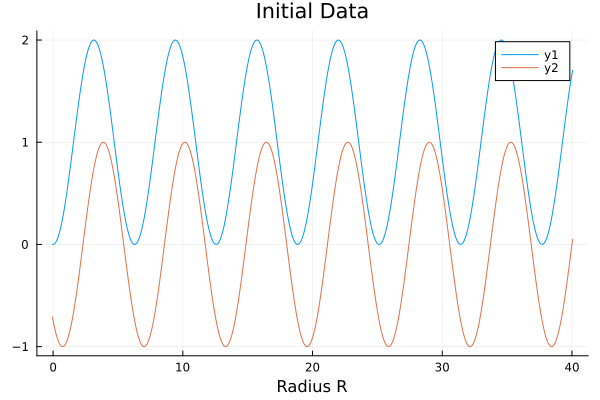

In [514]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="Radius R",title="Initial Data")

In [439]:
println(size(initg))
println(initg[1]) # makes sense because of the ghost points , only added in state_array
println(size(state_array))
println(state_array[1603,2])

(6405,)
0.0
(6405, 2)
0.9880316240937792


 ## Evolution

In [440]:
using ProgressMeter
@showprogress for k in 1:length(T)
    state_array=rungekutta4molstep(TMRHS,state_array,T,k,0) 
    #state_array=ghost(state_array)
            #if mod(k,30)==1
    using CSV, Tables
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:05


In [441]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/DATA/res4

## Movie of the evolution

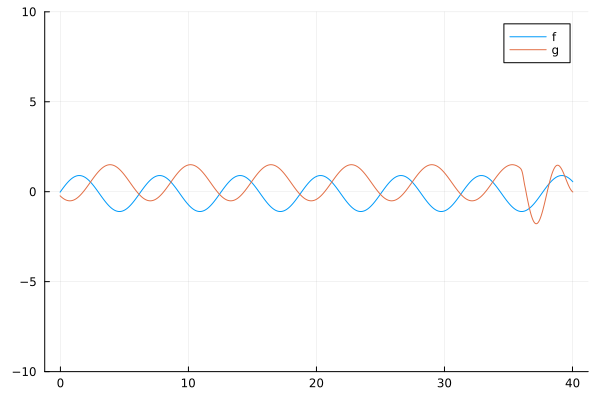

In [430]:
using Plots, CSV, DataFrames
import GR
for n in 1:10:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[1:L];
        plot2=functions3.Column2[1:L];
    d=round(T[n],digits=1)
    plot!(R, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display 
    
    end

## Convergence tests

In [11]:
# Different resolutions
res=1
dx=Rf/N
dx=dx/res
RR1 = range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx);
print(size(RR1))
L1=length(RR1);

res=2
dx=Rf/N
dx=dx/res
RR2 = range(ori-2.0*2, stop=Rf+2.0*2, step=dx);
print(size(RR2))
L2=length(RR2);

res=4
dx=Rf/N
dx=dx/res
RR4 = range(ori-2.0*4, stop=Rf+2.0*4, step=dx);
print(size(RR4))
L4=length(RR4);

(1605,)(3841,)(8961,)

In [13]:
using Plots, CSV, DataFrames
import GR
for n in 1:10:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    
    
    ##res1
    functions1=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/DATA/res2/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions1.Column1[1:L2];
        plot2=functions1.Column2[1:L2];
    print(size(plot1))
    d=round(T[n],digits=1)
    plot!(RR2, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display
    
    ##res2
    """functions2=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/DATA/res2/time_step$n.csv",header=false, delim=","))
    plot()
        plot3=functions2.Column1[1:L2];
        plot4=functions2.Column2[1:L2];
    d=round(T[n],digits=1)
    plot!(RR2, [plot3 plot4], labels=["f" "g"],ylims=(-10,10)) |> display"""
    
    end

LoadError: BoundsError: attempt to access 3205-element Vector{Float64} at index [1:3841]

In [16]:
println(L2)
print(size(RR2))

aux = zeros(L2)
state_array=[aux aux];

for n in 1:length(T)-1
    functions1=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/DATA/res1/time_step$n.csv",header=false, delim=","))
    plot1=functions1.Column1[1:L1];
    #print(size(plot1))
    for i in length(plot1)
        if i==1 or mod(1,2)==0
            
end

3841
(3841,)

LoadError: syntax: unexpected "mod"

In [93]:
aaaa=[0 1 2 3 4 5]
for i in 1:length(aaaa)
    if i==1 || mod(i,2)==0 || i==(length(aaaa)-1)
        println(i)
    end
end

1
2
4
5
6


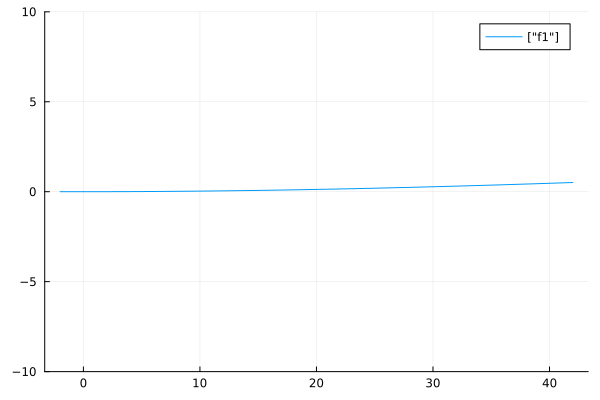

(45,)(25,)

LoadError: syntax: incomplete: premature end of input

In [21]:
x_res1 = range(ori-2*1, stop=Rf+2*1, step=1);
x_res2 = range(ori-2*2, stop=Rf+2*2, step=2);
x_res4 = range(ori-2*4, stop=Rf+2*4, step=4);


L_res1=length(x_res1);
L_res2=length(x_res2);
L_res4=length(x_res4);

using Plots, CSV, DataFrames
import GR

n=1
#time_step=T[2]-T[1];
IJulia.clear_output(true)
functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/DATA/res1/time_step$n.csv",header=false, delim=","))
    f1=functions3.Column1[1:L_res1];
    #f1=vec(f1)
    g1=functions3.Column2[1:L_res1];
    g1=vec(g1)
"""functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/DATA/res2/time_step$n.csv",header=false, delim=","))
    f2=functions3.Column1[1:L_res2];
    f2=vec(f2)
    g2=functions3.Column2[1:L_res2];
    g2=vec(g2)"""
    
    
    #f_diff=f1-f2
#d=round(T[n],digits=1)
plot()
plot!(x_res1, [f1], labels=["f1"],ylims=(-10,10)) |> display 
#plot!(x_res2, [f2], labels=["f2"],ylims=(-10,10)) |> display 


print(size(f1))
print(size(f2))
print(size(fdiff)


In [29]:
a = [1 2 3]
print(typeof(a))
a=vec(a)
append!(a,2)

x = Vector{Float64}
append!(x,2)

Matrix{Int64}

LoadError: MethodError: no method matching append!(::Type{Vector{Float64}}, ::Int64)
[0mClosest candidates are:
[0m  append!([91m::SentinelArrays.ChainedVector{T, A} where A<:AbstractVector{T}[39m, ::Any) where T at ~/.julia/packages/SentinelArrays/XvFr7/src/chainedvector.jl:662
[0m  append!([91m::Plots.Plot[39m, ::Integer, [91m::Tuple[39m) at ~/.julia/packages/Plots/fw4rv/src/utils.jl:778
[0m  append!([91m::Plots.Plot[39m, ::Integer, [91m::Real...[39m) at ~/.julia/packages/Plots/fw4rv/src/utils.jl:772
[0m  ...

## Double the resolution

In [43]:
"""#R1

m=4;
N=2.0^m*100.0;
Rf=40.0;
dx=Rf/N;
R1=range(ori, stop=Rf, step=dx);
dt=dx*0.4;
Nt=100.0*2^m;
Tf=Nt*dt; #final time
println("the final time is ", Tf)

print(size(R1))"""

dx_2 = dx / 2
R2 = range(ori, stop=Rf, step=dx_2)

println(size(R2))


R =range(ori-2.0*dx_2, stop=Rf+2.0*dx_2, step=dx_2); #change in case you want to evolve a symmetric domain

L=length(R);
println("step size is  ", dx_2)

#####

dt_2=dx_2*0.4;

T2=range(0,stop=Tf-dt_2,step=dt_2)
println(size(T2))

(3201,)
step size is  0.0125
(3200,)


In [24]:
#R2

"""m_2=8;
N_2=2.0^m*100.0;
Rf_2=40.0;
dx_2=Rf_2/N_2;
R2=range(ori, stop=Rf_2, step=dx_2);
dt_2=dx_2*0.4;
Nt_2=100.0*2^m_2;
Tf_2=Nt_2*dt_2; #final time
println("the final time is ", Tf_2)

print(size(R2))"""

"""aaadx=1
aaa = range(1, stop=5.0, step=aaadx);
bbbdx = aaadx / 2
bbb = range(1, stop=5.0, step=bbbdx)

println(size(aaa))
println(size(bbb))"""

"aaadx=1\naaa = range(1, stop=5.0, step=aaadx);\nbbbdx = aaadx / 2\nbbb = range(1, stop=5.0, step=bbbdx)\n\nprintln(size(aaa))\nprintln(size(bbb))"